<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_03_computer_vision_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision and Convolutional Neural Networks

In this notebook we're going to cover:
* Getting a dataset to work with
* Architecture of a convolutional neural network (CNN)
* And end-to-end binary image classification problem
* Steps in modeling with CNNs
* An end-to-end multiclass image classificatoin problem
* Making predicitons on our own custom images

# Get Food101 Data

In [1]:
# load library
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-03-15 01:14:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.251.6.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.3’

pizza_steak.zip.3   100%[===================>] 104.47M   117MB/s    in 0.9s    

2022-03-15 01:14:57 (117 MB/s) - ‘pizza_steak.zip.3’ saved [109540975/109540975]



In [3]:
# see how many files are in the steak and pizza folder
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/train/pizza")))

750
750


In [4]:
# View an image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


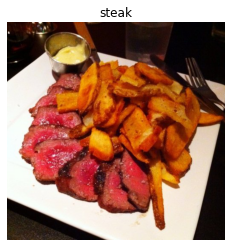

In [5]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

Image shape: (512, 512, 3)


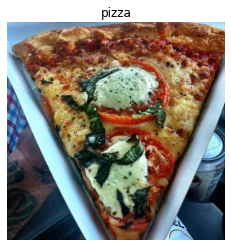

In [6]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [7]:
# get tensor's shape
tf.constant(img).shape

TensorShape([512, 512, 3])

# An End-to-End Example

In [8]:
# set seed
tf.random.set_seed(42)

In [9]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [11]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# set global variables
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIM = tf.keras.optimizers.Adam()
METRICS = ['accuracy']

In [13]:
# build a CNN model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, kernel_size=3, activation='relu', 
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

hist_0 = model_0.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 18s 283ms/step - loss: 0.5898 - accuracy: 0.6827 - val_loss: 0.5144 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 16s 336ms/step - loss: 0.4447 - accuracy: 0.7907 - val_loss: 0.3356 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3994 - accuracy: 0.8200 - val_loss: 0.3321 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3580 - accuracy: 0.8420 - val_loss: 0.3500 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3209 - accuracy: 0.8753 - val_loss: 0.3131 - val_accuracy: 0.8680


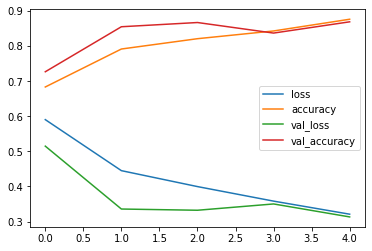

In [14]:
# plot losses
pd.DataFrame(hist_0.history).plot()
plt.show()

In [15]:
# view model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# View & Preprocess Image Data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


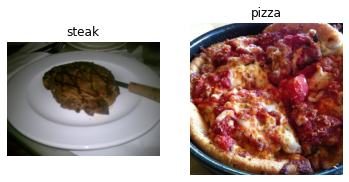

In [16]:
# view pizza vs steak images randomly
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [17]:
# define directory datasewt paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
# create train and test data generator and rescale the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [21]:
# how many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [22]:
# check image
images[0]

array([[[0.42352945, 0.43137258, 0.34509805],
        [0.31764707, 0.3254902 , 0.2392157 ],
        [0.26666668, 0.28235295, 0.18431373],
        ...,
        [0.42352945, 0.34901962, 0.37254903],
        [0.427451  , 0.34901962, 0.39607847],
        [0.45098042, 0.36862746, 0.427451  ]],

       [[0.2901961 , 0.30588236, 0.21568629],
        [0.45882356, 0.47450984, 0.37647063],
        [0.2627451 , 0.28627452, 0.18431373],
        ...,
        [0.39607847, 0.34117648, 0.34117648],
        [0.4156863 , 0.36862746, 0.37647063],
        [0.39607847, 0.34901962, 0.3647059 ]],

       [[0.37254903, 0.39607847, 0.29411766],
        [0.39607847, 0.41960788, 0.31764707],
        [0.30588236, 0.34117648, 0.23529413],
        ...,
        [0.34509805, 0.3254902 , 0.3019608 ],
        [0.30980393, 0.29803923, 0.27058825],
        [0.3372549 , 0.3254902 , 0.30588236]],

       ...,

       [[0.5137255 , 0.5019608 , 0.54509807],
        [0.52156866, 0.50980395, 0.54509807],
        [0.5294118 , 0

In [23]:
# see what first batch of label look slike
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Create A Baseline CNN Model

CNN parameters:
* filters: decides how many filters should pass over an input tensor (e.g. sliding windows over an image)
* kernel_size: determines the shape of the filters (sliding windows) over the output
* padding: pads the target tensor with zeroes (if `"same"`) to preserve input shape, or leaves in the target tensor as is (if `"valid"`), lowering output shape
* strides: the nubmer of steps a filter takes across an image at a time (e.g. if `strides=1`, a filter moves across an image 1 pixel at a time)

In [24]:
# create a simple baseline model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, # number of moving windows
        kernel_size=3, # size per window
        strides=1, # steps each window takes
        padding="valid", # condensed output
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [25]:
# compile the model
model_1.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

In [26]:
# get summary of model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [27]:
# fit the model
hist_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 13s 255ms/step - loss: 1.2553 - accuracy: 0.5933 - val_loss: 0.5491 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 0.5404 - accuracy: 0.7247 - val_loss: 0.4928 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 12s 251ms/step - loss: 0.5049 - accuracy: 0.7613 - val_loss: 0.4902 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4679 - accuracy: 0.7773 - val_loss: 0.4823 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4242 - accuracy: 0.8233 - val_loss: 0.4346 - val_accuracy: 0.7920


In [28]:
# evaluate baseline model
model_1.evaluate(test_data)

16/16 [==============================] - 3s 165ms/step - loss: 0.4346 - accuracy: 0.7920


[0.43463289737701416, 0.7919999957084656]

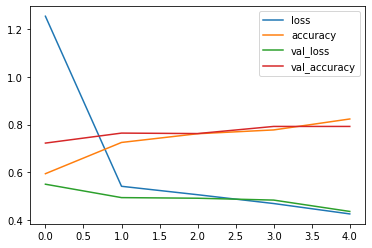

In [29]:
# plot history
pd.DataFrame(hist_1.history).plot()
plt.show()

In [30]:
# plot loss and accruacy separately using a function
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    fit, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
    ax[0].plot(epochs, loss, label='training_loss')
    ax[0].plot(epochs, val_loss, label='val_loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].plot(epochs, accuracy, label='training_accuracy')
    ax[1].plot(epochs, val_accuracy, label='val_accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

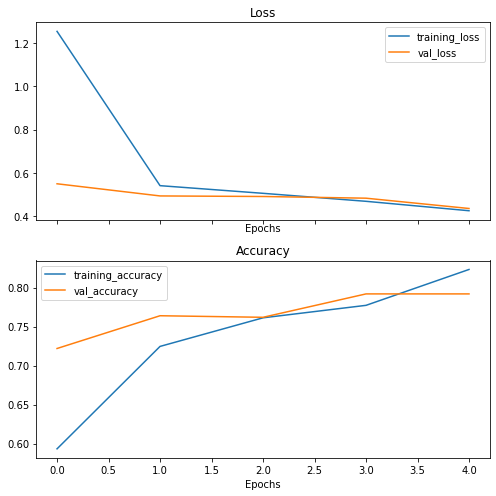

In [31]:
# plot loss and accuracy of model_1
plot_loss_curves(hist_1)

# Reducing Overfitting: Max Pooling

In [32]:
# one way to do that for CNN is with MaxPooling
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [33]:
# compile and fit
model_2.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

hist_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5917 - accuracy: 0.6660 - val_loss: 0.4334 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4751 - accuracy: 0.7660 - val_loss: 0.4976 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4409 - accuracy: 0.7960 - val_loss: 0.3632 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3970 - accuracy: 0.8240 - val_loss: 0.3594 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3628 - accuracy: 0.8447 - val_loss: 0.3509 - val_accuracy: 0.8540


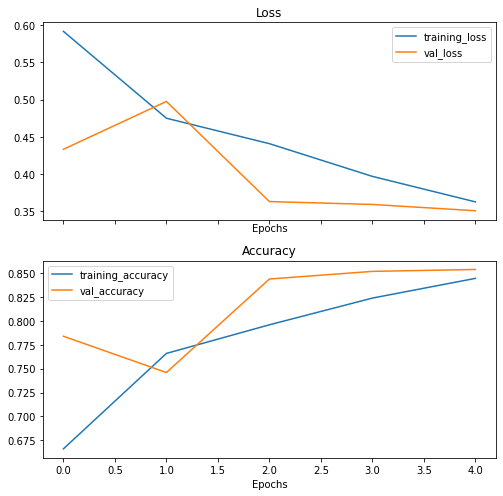

In [34]:
# view loss with model_2
plot_loss_curves(hist_2)

In [35]:
# evaluate model_2
model_2.evaluate(test_data)

16/16 [==============================] - 3s 158ms/step - loss: 0.3509 - accuracy: 0.8540


[0.3509351313114166, 0.8539999723434448]

# Reducing Overfitting: Data Augmentation

Increase the diversity of your training dataset without collecting more data (e.g. take your photos of pizza and randomly rotate them 30 degrees). Increase diversity forces a model to learn more generalization patterns. Data augmentation is usually only performed on the training data.

In [36]:
# create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1/255.) 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [37]:
# create data from datagen, augmented vs unaugmented
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False # for purpose of demonstration & comparison
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [38]:
# visualize
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

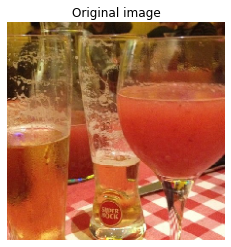

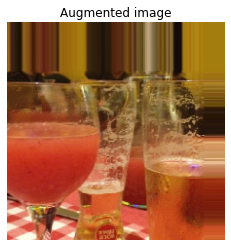

In [40]:
# show original
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# Train Model with Augmented Data

In [41]:
# build, compile, fit with augmented data
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

hist_3 = model_3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 532ms/step - loss: 0.7087 - accuracy: 0.4340 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6926 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5260
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6899 - val_accuracy: 0.5180
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6912 - accuracy: 0.5027 - val_loss: 0.6748 - val_accuracy: 0.5280


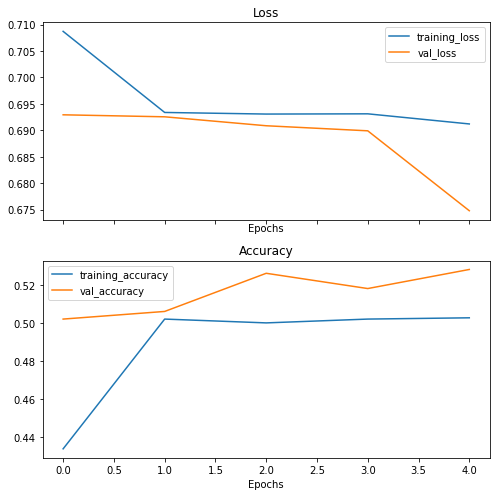

In [42]:
# ran longer and performed poorer
plot_loss_curves(hist_3)

In [43]:
# recreate datagens with shuffle back on
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [44]:
# build, compile, fit with augmented data
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

hist_4 = model_4.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 533ms/step - loss: 0.7342 - accuracy: 0.4567 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6935 - accuracy: 0.3887 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6937 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6933 - accuracy: 0.3927 - val_loss: 0.6932 - val_accuracy: 0.5000


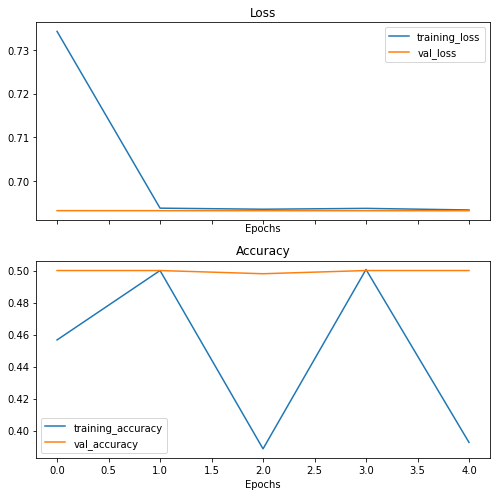

In [45]:
# view curves again -- much better
plot_loss_curves(hist_4)

# Back To TinyVGG Model

In [46]:
# back to same as TinyVGG (model_0)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=LOSS, optimizer=OPTIM, metrics=METRICS)

hist_5 = model_5.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 29s 594ms/step - loss: 0.6708 - accuracy: 0.5967 - val_loss: 0.6169 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 26s 560ms/step - loss: 0.6189 - accuracy: 0.6800 - val_loss: 0.5281 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 26s 561ms/step - loss: 0.6097 - accuracy: 0.6847 - val_loss: 0.5810 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 27s 571ms/step - loss: 0.5941 - accuracy: 0.7027 - val_loss: 0.4949 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5889 - accuracy: 0.7107 - val_loss: 0.4663 - val_accuracy: 0.8140


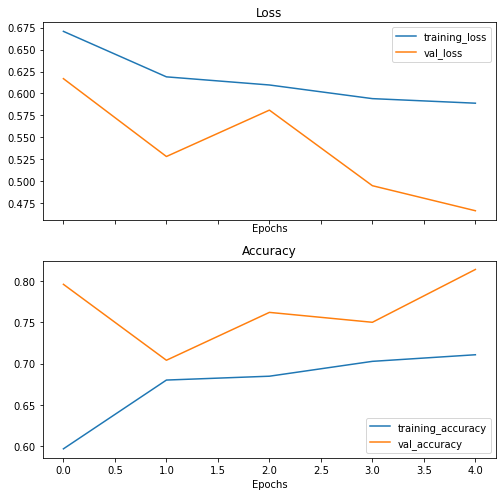

In [47]:
# plot TinyVGG loss curves
plot_loss_curves(hist_5)

# Making a Prediction